In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_plate = cv2.imread('../../DATA/car_plate.jpg')

In [7]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)

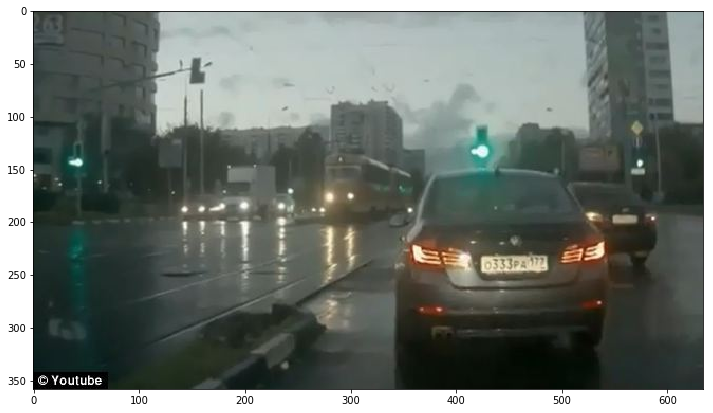

In [10]:
display(car_plate)

In [11]:
car_plate_cascade = cv2.CascadeClassifier('../../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [20]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = car_plate_cascade.detectMultiScale(plate_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),3)
    return plate_img

In [21]:
result = detect_plate(car_plate)

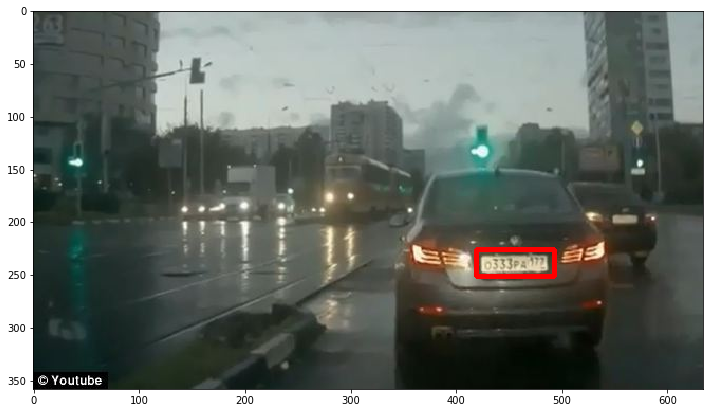

In [22]:
display(result)

In [30]:
def detect_plate_and_blur(img):
    plate_img = img.copy()
    plate_rects = car_plate_cascade.detectMultiScale(plate_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),3)
        roi = plate_img[y:y+h,x:x+w]
        blur_roi = cv2.medianBlur(roi,7)
        plate_img[y:y+h,x:x+w] = blur_roi
    return plate_img

In [31]:
result = detect_plate_and_blur(car_plate)

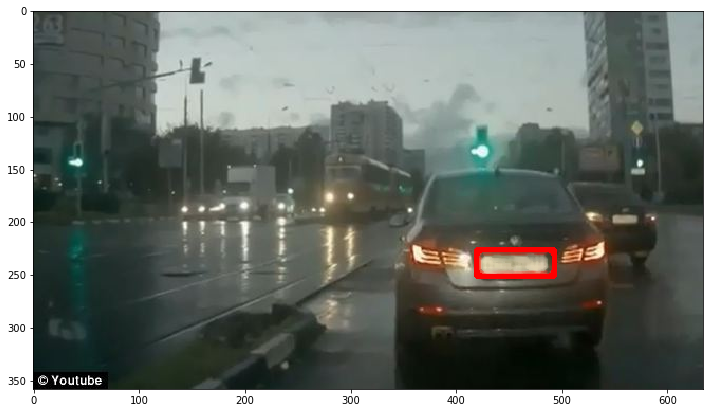

In [32]:
display(result)